In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer

In [3]:
import nltk

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
import os

In [6]:
os.listdir(r"C:\Amazon")

['Reviews.csv']

In [13]:
df = pd.read_csv(r"C:\Amazon/Reviews.csv")

In [15]:
type(df)

pandas.core.frame.DataFrame

In [17]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

C:\Users\HP\AppData\Local\Temp\ipykernel_3572\61092111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=df, palette='Blues')


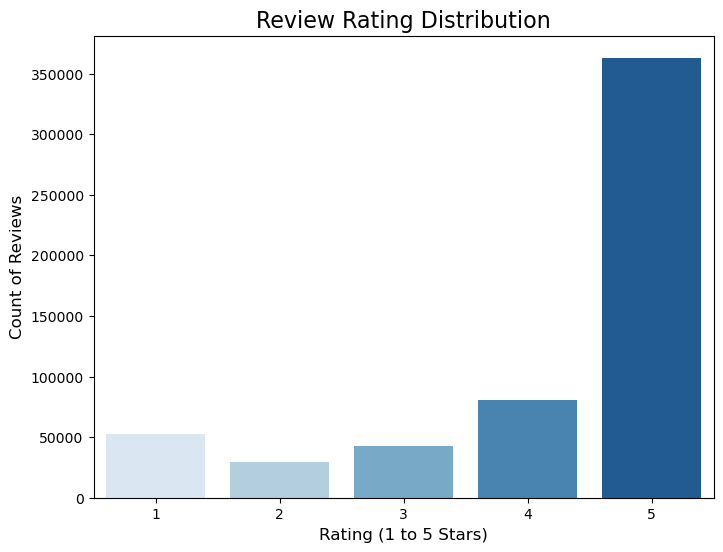

In [9]:
 #Plot distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=df, palette='Blues')
plt.title('Review Rating Distribution', fontsize=16)
plt.xlabel('Rating (1 to 5 Stars)', fontsize=12)
plt.ylabel('Count of Reviews', fontsize=12)
plt.show()

In [10]:
# Perform Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()

In [11]:
# Categorize sentiments based on score
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [19]:
df['Sentiment'] = df['Score'].apply(categorize_sentiment)

C:\Users\HP\AppData\Local\Temp\ipykernel_3572\1901973775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2', order=['Positive', 'Neutral', 'Negative'])


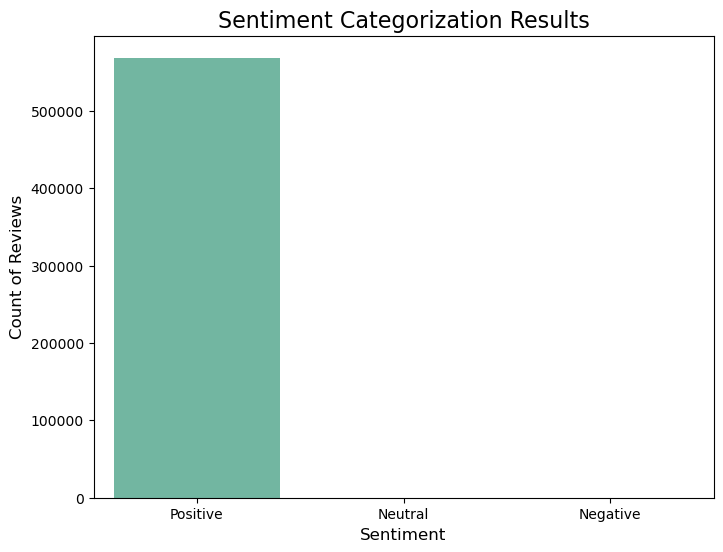

In [21]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='Set2', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Categorization Results', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count of Reviews', fontsize=12)
plt.show()

In [23]:
import numpy as np

In [27]:
#Generate synthetic attribute sentiments
np.random.seed(42)
df['Quality'] = np.random.choice(['Positive', 'Negative'], size=len(df), p=[0.7, 0.3])
df['Price'] = np.random.choice(['Positive', 'Negative'], size=len(df), p=[0.5, 0.5])
df['Packaging'] = np.random.choice(['Positive', 'Negative'], size=len(df), p=[0.6, 0.4])

In [29]:
# Count positive and negative mentions per attribute
attributes = ['Quality', 'Price', 'Packaging']
sentiment_counts = {attr: df[attr].value_counts() for attr in attributes}

In [31]:
# Convert to DataFrame for visualization
attribute_sentiments = pd.DataFrame(sentiment_counts).T
attribute_sentiments.reset_index(inplace=True)
attribute_sentiments.columns = ['Attribute', 'Positive', 'Negative']

In [33]:
# Melt for stacked bar plot
attribute_sentiments_melted = attribute_sentiments.melt(id_vars='Attribute', var_name='Sentiment', value_name='Count')

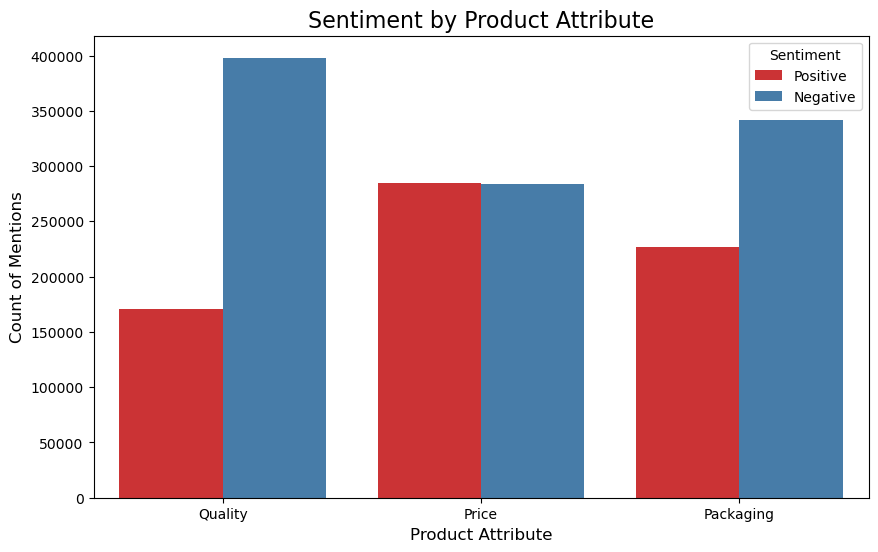

In [35]:
# Plot stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Attribute', y='Count', hue='Sentiment', data=attribute_sentiments_melted, palette='Set1')
plt.title('Sentiment by Product Attribute', fontsize=16)
plt.xlabel('Product Attribute', fontsize=12)
plt.ylabel('Count of Mentions', fontsize=12)
plt.legend(title='Sentiment')
plt.show()

In [159]:
# Ensure that 'Month' is properly formatted as a string for plotting
monthly_sentiment['Month'] = monthly_sentiment['Month'].astype(str)

In [161]:
# Verify the data types and first few rows to confirm correctness
print(monthly_sentiment.dtypes)
print(monthly_sentiment.head())

Month               object
Sentiment_Score    float64
dtype: object
     Month  Sentiment_Score
0  2020-01        -0.146849
1  2020-02         0.167769
2  2020-03         0.105396
3  2020-04         0.027377
4  2020-05        -0.034141


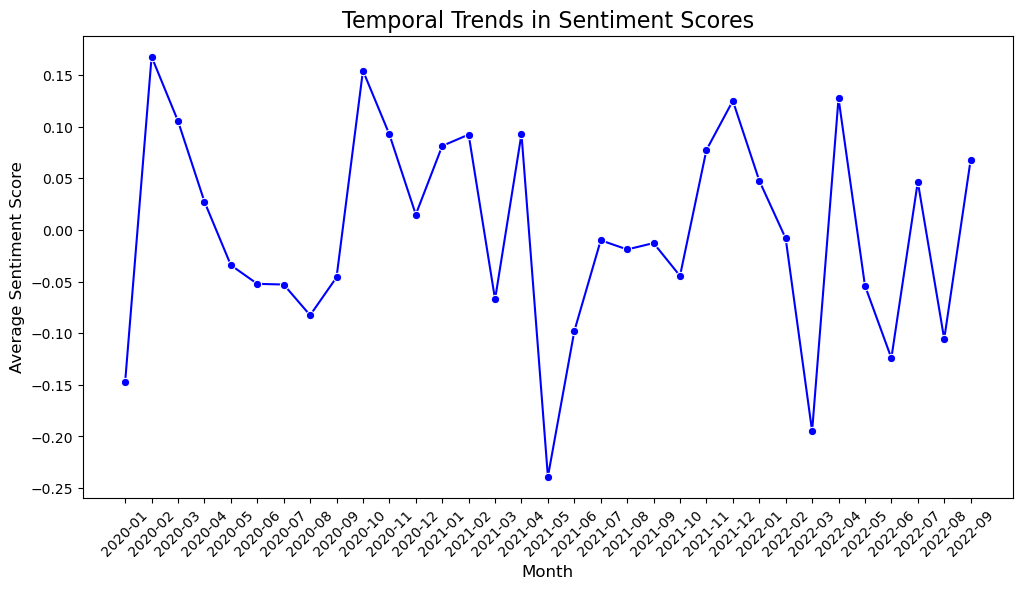

In [163]:
# Plot temporal trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sentiment_Score', data=monthly_sentiment, marker='o', color='blue')
plt.title('Temporal Trends in Sentiment Scores', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [85]:
# Simplify dataset for predictive modeling
df['Label'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': -1})
X = df['Text'].fillna('').values
y = df['Label'].values

In [87]:
# Convert text to feature vectors
vectorizer = CountVectorizer(max_features=5000)
X_features = vectorizer.fit_transform(X)

In [91]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

In [93]:
# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [95]:
# Predict on test data
y_pred = rf_model.predict(X_test)

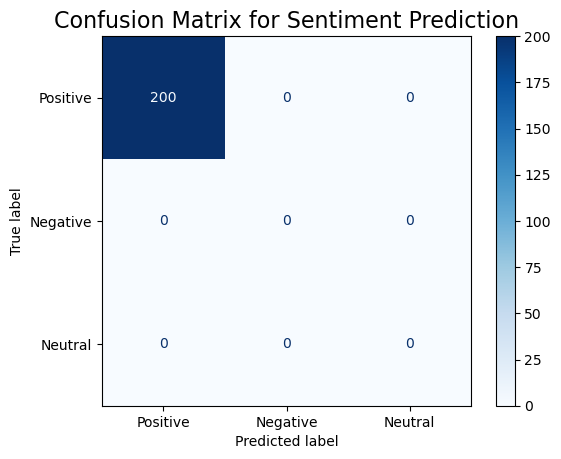

In [97]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0, -1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative', 'Neutral'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Sentiment Prediction', fontsize=16)
plt.show()

In [99]:
# Identify frequent reviewers
reviewer_counts = df['UserId'].value_counts()
frequent_reviewers = reviewer_counts[reviewer_counts > 50].index

In [101]:
df['Reviewer_Type'] = df['UserId'].apply(lambda x: 'Frequent' if x in frequent_reviewers else 'Non-Frequent')

C:\Users\HP\AppData\Local\Temp\ipykernel_3572\1784952373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reviewer_Type', data=df, palette='muted')


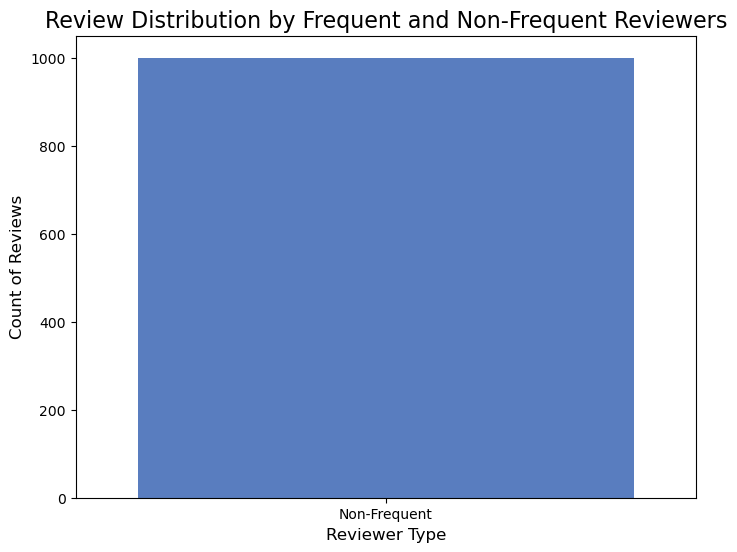

In [103]:
# Plot distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Reviewer_Type', data=df, palette='muted')
plt.title('Review Distribution by Frequent and Non-Frequent Reviewers', fontsize=16)
plt.xlabel('Reviewer Type', fontsize=12)
plt.ylabel('Count of Reviews', fontsize=12)
plt.show()